# yFinance
Is an open source library that use Python and allows to analyse finance data.

Documentation of yFinance: https://github.com/ranaroussi/yfinance

## Problem 1: Data from yfinance
Using the yfinance Python package, and a function called 'get_data()' we will downloads all hourly data for the previous five days for the five FAANG stocks.
This function should save the data into a folder called 'data' that is in the root of this repository using a filename with the format YYYYMMDD-HHmmss.csv

### 1.1 Preparing the environment
First, we must prepare the necessary working environment for the first problem. This introductory section is divided as follows:
- Library installation.
- Functionality test, using only one company (Microsoft).
- Verified company information.
- Use multiple tickers (FAANG) to obtain information, including a 5-day history.

To run the program we need to import necessary libraries, like yfinance, pandas and datetime.

In [146]:
# install yfinance
'''we use the symbol % in jupyter notebooks, to avoid issues of syntaxis'''
%pip install yfinance



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [147]:
# yahoo Finance data
import yfinance as yf

# import DataFrames
import pandas as pd

# import dates and times
import datetime as dt

# import Os for files in directory
import os 

# import matplotlib to plot
import matplotlib.pyplot as plt


We can verify if the libraries are imported correctly to get some data. We will get data of one company [Microsoft]

In [148]:
# Get the data for Microsoft
dat = yf.Ticker("MSFT")

In [149]:
# Verify the data.
dat

yfinance.Ticker object <MSFT>

We can have some information of Microsoft, using 'dat.info'

In [150]:
dat.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "Microsoft Corporation develops and supports software, services, devices, and solutions worldwide. The company's Productivity and Business Processes segment offers Microsoft 365 Commercial, Enterprise Mobility + Security, Windows Commercial, Power BI, Exchange, SharePoint, Microsoft Teams, Security and Compliance, and Copilot; Microsoft 365 Commercial products, such as Windows Commercial on-premises and Office licensed services; Microsoft 365 Consumer products and cloud services, such as Microsoft 365 Consumer subscriptions, Office licensed on-premises, and other consu

Having verified that our code works, we can begin to have the data of the five FAANG stocks. Using multiple tickers.

In [151]:
# Multiple tickers.

tickers = yf.Tickers ('META, AAPL, AMZN, NFLX, GOOG')

# Show tickers.
tickers

yfinance.Tickers object <META,AAPL,AMZN,NFLX,GOOG>

In [152]:
# Get history data of the last 5 days
dat.history(period='5d')


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-12-04 00:00:00-05:00,479.760010,481.320007,476.489990,480.839996,22318200,0.0,0.0
2025-12-05 00:00:00-05:00,482.519989,483.399994,478.880005,483.160004,22608700,0.0,0.0
2025-12-08 00:00:00-05:00,484.890015,492.299988,484.380005,491.019989,21965900,0.0,0.0
2025-12-09 00:00:00-05:00,489.100006,492.119995,488.500000,492.019989,14696100,0.0,0.0
2025-12-10 00:00:00-05:00,484.029999,484.250000,475.079987,478.260010,25165324,0.0,0.0


### 1.1.2 Downdload Data
Using yf.download to retrieve historical data for multiple tickers at once. 
Returns a pandas DataFrame with a MultiIndex columns (like: attribute, ticker).

Link:

In [153]:
# Get historical data for multiple tickers at once.

yf.download (["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='5d')

/tmp/ipykernel_2153/958711071.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  yf.download (["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='5d')
[*********************100%***********************]  5 of 5 completed


Price            Close                                                  \
Ticker            AAPL        AMZN        GOOG        META        NFLX   
Date                                                                     
2025-12-04  280.700012  229.110001  318.182434  661.530029  103.220001   
2025-12-05  278.779999  229.529999  321.879974  673.419983  100.239998   
2025-12-08  277.890015  226.889999  314.450012  666.799988   96.790001   
2025-12-09  277.179993  227.919998  317.750000  656.960022   96.709999   
2025-12-10  278.899994  231.990005  321.010010  649.859985   92.529503   

Price             High                                                  ...  \
Ticker            AAPL        AMZN        GOOG        META        NFLX  ...   
Date                                                                    ...   
2025-12-04  284.730011  233.500000  322.888348  676.099976  103.800003  ...   
2025-12-05  281.140015  231.240005  323.618830  674.690002  104.790001  ...   
2025-12-08  279.670013  230.830002  321.230011  676.710022   99.889999  ...   
2025-12-09  280.029999  228.570007  318.709015  664.479980   97.239998  ...   
2025-12-10  279.750000  232.419998  321.869995  654.510010   96.959999  ...   

Price             Open                                                  \
Ticker            AAPL        AMZN        GOOG        META        NFLX   
Date                                                                     
2025-12-04  284.100006  232.770004  322.834398  676.000000  103.570000   
2025-12-05  280.540009  230.320007  319.791341  664.000000   98.779999   
2025-12-08  278.130005  229.589996  321.029999  669.340027   99.870003   
2025-12-09  278.160004  226.839996  313.100006  663.770020   97.029999   
2025-12-10  277.869995  228.589996  316.619995  650.400024   96.735001   

Price         Volume                                           
Ticker          AAPL      AMZN      GOOG      META       NFLX  
Date                                                           
2025-12-04  43989100  45683200  20831600  29874600   51779100  
2025-12-05  47265800  33117400  15719900  21207900  133363600  
2025-12-08  38211800  35019200  22006900  13161000  100906300  
2025-12-09  32193300  25841700  14151300  12997100   51745600  
2025-12-10  20432337  28397964  12761031  12124576   59104832  

[5 rows x 25 columns]

Assign the downloaded historical data to the df variable

Returns a pandas DataFrame

In [154]:
# Download historical data to 'df' 
df = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='5d')

/tmp/ipykernel_2153/621637818.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='5d')
[*********************100%***********************]  5 of 5 completed


In [155]:
# Displays the columns of the DataFrame
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

The index is a DatetimeIndex representing the observation timestamps. Practically index based on dates and times.

Source: https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html

In [156]:
# Show the index
df.index

DatetimeIndex(['2025-12-04', '2025-12-05', '2025-12-08', '2025-12-09',
               '2025-12-10'],
              dtype='datetime64[ns]', name='Date', freq=None)

### 1.1.3 Date and Times
As part of the program, we need to download all hourly data for the last five days for the five FAANG stocks.
For that we will use the module that provides classes to manipulate dates and times.
https://docs.python.org/3/library/datetime.html


In [157]:
'''To have a cleaner structure, the data frame module was added to the beginning of the code along with the other libraries.'''
# import datetime as dt 

'To have a cleaner structure, the data frame module was added to the beginning of the code along with the other libraries.'

In [158]:
# Importing datetime module, to manipulate dates and times.
# To get the current date and time.
now = dt.datetime.now()

# Show.
now

datetime.datetime(2025, 12, 10, 20, 56, 47, 160283)

Format to the data and time. We can use 'now.strftime' and specify the format of day, months, year and time.
Resource: https://docs.python.org/3.6/library/date

In [159]:
# Format date and time.
now.strftime("%Y%m%d-%H%M%S")

'20251210-205647'

### 1.1.4 File name and Save file
Part of the task is to assign to each created CSV a name composed by date and time, following the format: YYMMDD and HHMMSS, and save the CVS genarated every time that the program get ejecuted, to a dictionary called "data".

In [160]:
# File name.
"../data/" + now.strftime("%Y%m%d-%H%M%S") + ".csv"

'../data/20251210-205647.csv'

In [161]:
# Save data as CSV.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

df.to_csv("./data/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S") + ".csv")

## 1.2 Function 'get_data()'

The get_data() function downloads all hourly data for the previous five days for the five FAANG stocks and save the data into a directory called 'data' in the root of this repository using a filename with the format YYYYMMDD-HHmmss.csv
Save data in a directory: https://stackoverflow.com/questions/273192/how-do-i-create-a-directory-and-any-missing-parent-directories

In [162]:
def get_data():
    '''Download the FAANG hourly for the last 5 days and save it in a folder called (data)'''
    tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOG"]

    # Download hourly prices for the past 5 days
    df = yf.download(tickers, period="5d", interval="1h")
    
    
    # Save data as CSV
    # Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
    data_dir = "data"
    os.makedirs(data_dir, exist_ok=True) #This create a directory if doesn't exist

    '''Format to the data and time. We can use 'now.strftime'''
    # File name with format date and time.
    filename = dt.datetime.now().strftime("%Y%m%d-%H%M%S") + ".csv"
    filename_time = f"{data_dir}/{filename}"

    '''The return keyword is to exit a function and return a value. Source: https://www.w3schools.com/python/ref_keyword_return.asp'''
    df.to_csv(filename_time)
    return df, filename_time


In [163]:
'''Test if the function works'''
# Download hourly prices for the past 5 days
df = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='5d', interval='1h')

# Show data.
get_data

/tmp/ipykernel_2153/3852351785.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='5d', interval='1h')
[*********************100%***********************]  5 of 5 completed


<function __main__.get_data()>

In [164]:
# show the index including time
df.index

DatetimeIndex(['2025-12-04 14:30:00+00:00', '2025-12-04 15:30:00+00:00',
               '2025-12-04 16:30:00+00:00', '2025-12-04 17:30:00+00:00',
               '2025-12-04 18:30:00+00:00', '2025-12-04 19:30:00+00:00',
               '2025-12-04 20:30:00+00:00', '2025-12-05 14:30:00+00:00',
               '2025-12-05 15:30:00+00:00', '2025-12-05 16:30:00+00:00',
               '2025-12-05 17:30:00+00:00', '2025-12-05 18:30:00+00:00',
               '2025-12-05 19:30:00+00:00', '2025-12-05 20:30:00+00:00',
               '2025-12-08 14:30:00+00:00', '2025-12-08 15:30:00+00:00',
               '2025-12-08 16:30:00+00:00', '2025-12-08 17:30:00+00:00',
               '2025-12-08 18:30:00+00:00', '2025-12-08 19:30:00+00:00',
               '2025-12-08 20:30:00+00:00', '2025-12-09 14:30:00+00:00',
               '2025-12-09 15:30:00+00:00', '2025-12-09 16:30:00+00:00',
               '2025-12-09 17:30:00+00:00', '2025-12-09 18:30:00+00:00',
               '2025-12-09 19:30:00+00:00', '2025-1

In [165]:
# Print data as CSV.

print(df.to_csv())

Price,Close,Close,Close,Close,Close,High,High,High,High,High,Low,Low,Low,Low,Low,Open,Open,Open,Open,Open,Volume,Volume,Volume,Volume,Volume
Ticker,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,
2025-12-04 14:30:00+00:00,281.2250061035156,228.77499389648438,317.510009765625,665.72998046875,102.54000091552734,284.7300109863281,232.69000244140625,321.5400085449219,669.2000122070312,103.63999938964844,280.2699890136719,228.05999755859375,315.6000061035156,660.1099853515625,102.26000213623047,284.1099853515625,232.64500427246094,321.010009765625,666.4249877929688,102.93000030517578,6410843,7888562,4390383,10059794,9053564
2025-12-04 15:30:00+00:00,280.2799987792969,227.89999389648438,316.80999755859375,664.8499755859375,102.12000274658203,281.6000061035156,228.87840270996094,317.7799987792969,667.5900268554688,102.83999633789062,279.80999755859375,226.8000030517578,315.9549865722

## Problem 2: Plots
The function plot_data() opens the latest data file in the data folder and plots the Close prices for each of the five stocks. 
The plot include axis labels, a legend, and the date as a title. 
The function save the plot into a plots folder in the root of this repository using a filename in the format YYYYMMDD-HHmmss.png.

### 1.1 Preparing the environment
First, we must prepare the necessary working environment for the second problem. This introductory section is divided as follows:
- Import matploplib (It was added at the begining of the code).
- Functionality test, using only one company (Microsoft).
- Verified company information.
- Use multiple tickers (FAANG) to obtain information, including a 5-day history.

<Axes: xlabel='Datetime'>

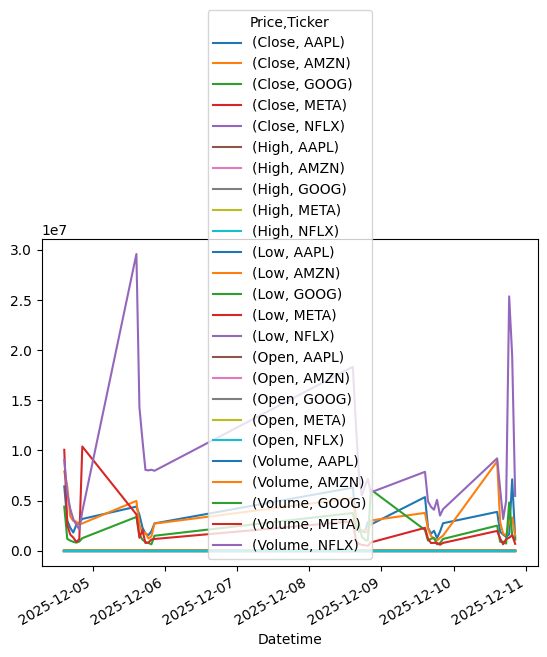

In [166]:
df.plot()

In [167]:
# List of columns of df
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

<Axes: xlabel='Datetime'>

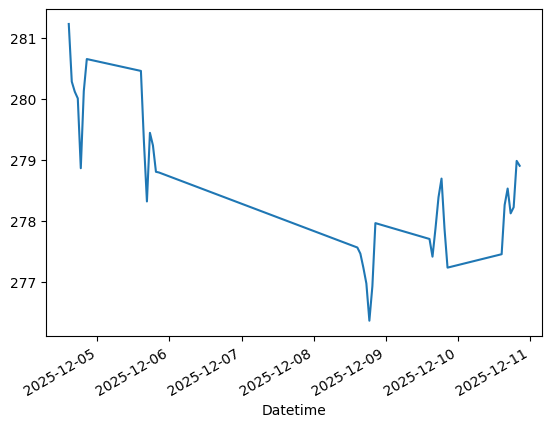

In [168]:
# Plot closing price of one of Apple.
df[('Close', 'AAPL')].plot()


In [169]:
df['Close']

Ticker,AAPL,AMZN,GOOG,META,NFLX
Datetime,,,,,
2025-12-04 14:30:00+00:00,281.225006,228.774994,317.510010,665.729980,102.540001
2025-12-04 15:30:00+00:00,280.279999,227.899994,316.809998,664.849976,102.120003
2025-12-04 16:30:00+00:00,280.114990,227.169998,317.065002,668.190002,102.279999
2025-12-04 17:30:00+00:00,280.005005,228.300003,317.684998,664.765015,102.968903
2025-12-04 18:30:00+00:00,278.859985,228.309998,317.281006,662.799927,103.065002
2025-12-04 19:30:00+00:00,280.125000,228.708206,317.994995,660.634399,103.419800
2025-12-04 20:30:00+00:00,280.649994,229.100006,318.390015,661.729980,103.220001
2025-12-05 14:30:00+00:00,280.455109,230.938400,322.464996,670.984985,104.665001
2025-12-05 15:30:00+00:00,279.295013,229.673996,320.878998,668.650024,100.519997


<Axes: xlabel='Datetime'>

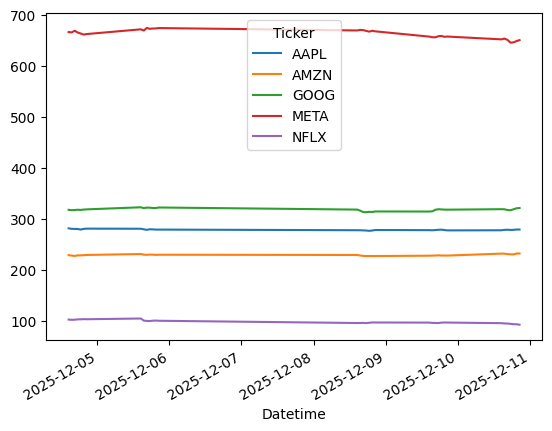

In [170]:
# Plot the close price of 5 FAANG stocks
df['Close'].plot()

## Save Plot

Sources: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

<Axes: xlabel='Datetime'>

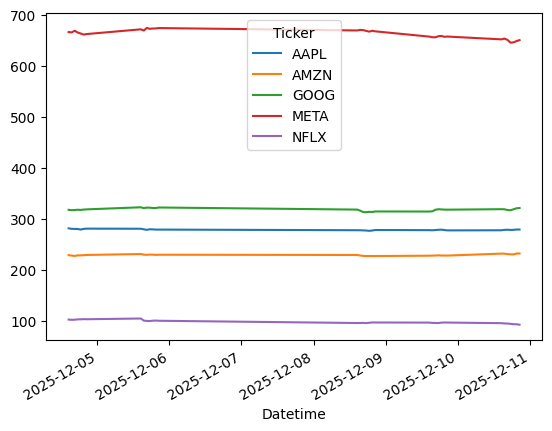

In [171]:
'''test to save the plot'''

# Create new figure and axis
fig, ax = plt.subplots()

# Plot all closing prices
df['Close'].plot(ax=ax)

# Save fig
#fig.savefig('./plots/test.png')


### 2.1 save the plot with timestamp

In [172]:
'''
# To get the current date and time.
now = dt.datetime.now()

# Format date and time.
now.strftime("%Y%m%d-%H%M%S")

# File name.
filename_plot = "../plots/" + now.strftime("%Y%m%d-%H%M%S") + ".png"

# Save fig
fig.savefig(filename_plot)
'''

'\n# To get the current date and time.\nnow = dt.datetime.now()\n\n# Format date and time.\nnow.strftime("%Y%m%d-%H%M%S")\n\n# File name.\nfilename_plot = "../plots/" + now.strftime("%Y%m%d-%H%M%S") + ".png"\n\n# Save fig\nfig.savefig(filename_plot)\n'

### Sort files

In [175]:
# list the files in the data folder
data_files = os.listdir('./data/')

# show data files 
data_files

['20251208-161128.csv',
 '20251104-215921.csv',
 '20251207-171630.csv',
 '20251208-150808.csv',
 '20251210-205647.csv',
 '20251210-203811.csv',
 '20251210-011744.csv',
 '20251108-154055.csv',
 '20251210-203053.csv',
 '20251207-163839.csv',
 '20251108-152600.csv',
 '20251207-225247.csv',
 '20251207-195029.csv',
 '20251210-203921.csv',
 '20251116-235802.csv',
 '20251210-203651.csv',
 '20251104-215932.csv',
 '20251208-121953.csv',
 '20251208-160827.csv',
 '20251116-230805.csv',
 '20251210-201458.csv',
 '20251207-215657.csv',
 '20251207-163707.csv']

In [176]:
# sort the list of files
data_files.sort(reverse=True)

# show 
data_files


['20251210-205647.csv',
 '20251210-203921.csv',
 '20251210-203811.csv',
 '20251210-203651.csv',
 '20251210-203053.csv',
 '20251210-201458.csv',
 '20251210-011744.csv',
 '20251208-161128.csv',
 '20251208-160827.csv',
 '20251208-150808.csv',
 '20251208-121953.csv',
 '20251207-225247.csv',
 '20251207-215657.csv',
 '20251207-195029.csv',
 '20251207-171630.csv',
 '20251207-163839.csv',
 '20251207-163707.csv',
 '20251116-235802.csv',
 '20251116-230805.csv',
 '20251108-154055.csv',
 '20251108-152600.csv',
 '20251104-215932.csv',
 '20251104-215921.csv']